# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import scipy


In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

print(hospital_read_df.head())

                               Hospital Name  Provider Number State  \
0       FROEDTERT MEMORIAL LUTHERAN HOSPITAL           520177    WI   
1                        PROVIDENCE HOSPITAL            90006    DC   
2          BEAUFORT COUNTY MEMORIAL HOSPITAL           420067    SC   
3  ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER           140208    IL   
4          BRAZOSPORT REGIONAL HEALTH SYSTEM           450072    TX   

             Measure Name Number of Discharges  Footnote  \
0  READM-30-HIP-KNEE-HRRP                  242       NaN   
1  READM-30-HIP-KNEE-HRRP                  247       NaN   
2  READM-30-HIP-KNEE-HRRP                  586       NaN   
3  READM-30-HIP-KNEE-HRRP                  965       NaN   
4  READM-30-HIP-KNEE-HRRP                  149       NaN   

   Excess Readmission Ratio  Predicted Readmission Rate  \
0                    1.9095                        10.8   
1                    1.7521                         9.2   
2                    1.5836        

****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\JustinD\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


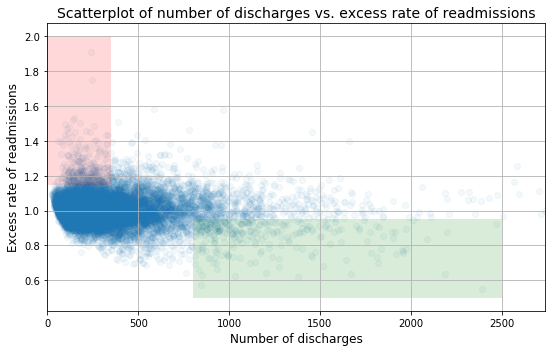

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.05)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

Data still has null values hat may be factored into the analysis.  First remove these values to receive a more accurate picture.

In [6]:
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int32
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.1+ MB


The clean version of the data is not entirely clean.  From the info above, we can see that there are missing values in the data.

In [7]:
#recleaning the data
real_clean_df=clean_hospital_read_df[['Number of Discharges','Excess Readmission Ratio']].dropna()
print(real_clean_df.head())
print(real_clean_df.info())

      Number of Discharges  Excess Readmission Ratio
1832                    25                    1.0914
1699                    27                    1.0961
1774                    28                    1.0934
1853                    29                    1.0908
1290                    30                    1.1123
<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 1832 to 13666
Data columns (total 2 columns):
Number of Discharges        11497 non-null int32
Excess Readmission Ratio    11497 non-null float64
dtypes: float64(1), int32(1)
memory usage: 224.6 KB
None


Slope of Regression Line:  -2.85650529438e-05
correlation: -0.09739794351079353
p value: 0.0


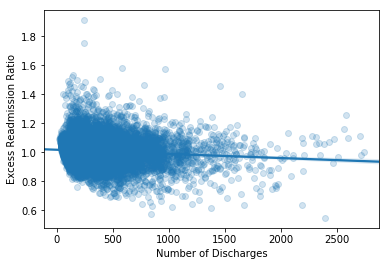

In [9]:
#Checking A

#ploting with regression line
test_plot=sns.regplot(clean_hospital_read_df['Number of Discharges'][81:-3],clean_hospital_read_df['Excess Readmission Ratio'][81:-3], scatter_kws={'alpha':0.2})

#Seaborn does not give you the slope of the regression directly so here is a backdoor approach.
rise= test_plot.get_lines()[0].get_ydata().min() - test_plot.get_lines()[0].get_ydata().max()
run= test_plot.get_lines()[0].get_xdata().max() - test_plot.get_lines()[0].get_xdata().min()
reg_slope=rise/run
print('Slope of Regression Line: ', reg_slope)

#correlation
remit_corr= real_clean_df['Excess Readmission Ratio'].corr(real_clean_df['Number of Discharges'])
print('correlation: {}'.format(remit_corr))

#bootstrap to test the p-value
df_corr = real_clean_df[np.isfinite(real_clean_df['Excess Readmission Ratio'])]
nd = df_corr['Number of Discharges']
rr = df_corr['Excess Readmission Ratio']
perm_reps = np.empty(10000)
for i in range(10000):
    perms = np.random.permutation(nd)
    perm_reps[i] = np.corrcoef(perms,rr)[0,1]
p_corr = np.sum(perm_reps <= remit_corr)/10000
print('p-value of the correlation: {}'.format(p_corr))


From the chart and numbers above we can see that there is in fact a slight negitive correlation with a very mild slope downward.  The p-value of correlation is much smaller than the 0.01 threshold given for significance.  

In [ ]:
#Checking B statements:

#separating off the tails
under_100= real_clean_df[real_clean_df['Number of Discharges']<=100]
over_1000= real_clean_df[real_clean_df['Number of Discharges']>=1000]

#double checking the math from the problem
print ('Mean of readmission ratio of discharges under 100: ', under_100['Excess Readmission Ratio'].mean())
print ('Mean of readmission ratio of discharges over 1000: ', over_1000['Excess Readmission Ratio'].mean())
print('percentage of under_100 above 1: ', len(under_100[under_100['Excess Readmission Ratio']>1])/len(under_100))
print('percentage of over_1000 above 1: ', len(over_1000[over_1000['Excess Readmission Ratio']>1])/len(over_1000))
print('These results match the statistics given in B')
print('')

#fattening the tails to be relevant to the suggestion
under_300= real_clean_df[real_clean_df['Number of Discharges']<=300]
over_700= real_clean_df[real_clean_df['Number of Discharges']>=700]

print ('Mean of readmission ratio of discharges under 300: ', under_300['Excess Readmission Ratio'].mean())
print ('Mean of readmission ratio of discharges over 700: ', over_700['Excess Readmission Ratio'].mean())
print('percentage of under_300 above 1: ', len(under_300[under_300['Excess Readmission Ratio']>1])/len(under_300))
print('percentage of over_700 above 1: ', len(over_700[over_700['Excess Readmission Ratio']>1])/len(over_700))



#Do you agree with the above recommendations?

There is deffinitely a correlation between capacity and readmissions rates.  This could be due to lack of resources, and this sounds like a likely reason, but this should be investigated further.  When instituting new policy, it is imperitive that you make sure that consider future indirect consequences as well the ones you are hoping to achieve.  By sizing hospitals by discharge in this new policy, it is possible to game the system and reaccepting patients rapidly to boost the number of discharges above the threshold needed to avoid costly upgrades.  Reducing the number of hospitals may also have negitive effects on the population since now patients have to travel further to seek care.  If the policies work too well, there seems to be a positive corelation between 1800 and 3000, which could lead to an unintended increase in readmissions as demonstrated below.  Despite having a p-value that is under the 0.01 threshhold, these points are outliers to our data and more should be done to attest to the accuracy of this trend.

In [ ]:
over_1800= real_clean_df[real_clean_df['Number of Discharges']>=1800]
between_1800_and_3000=over_1800[over_1800['Number of Discharges']<=3000]

#ploting with regression line
upward_trend=sns.regplot(between_1800_and_3000['Number of Discharges'],between_1800_and_3000['Excess Readmission Ratio'])

corr_upwards, p_upwards=scipy.stats.pearsonr(between_1800_and_3000['Excess Readmission Ratio'], between_1800_and_3000['Number of Discharges'])
print('Correlation between 1800 and 3000 discharges: {}'.format(corr_upwards))
print('p-value of this correlation: {}'.format(p_upwards))

